In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import pandas
import matplotlib.colors as colors
from tqdm import tqdm

In [2]:
def extract_all_light(filename, edep_thr_scint=0, edep_thr_BGO=0,  particles=0, verbose=False, default=-1000):
      
    #BGO and plastic scintillators detector IDs
    detIDmin_BGO = 906
    detIDmax_BGO = 921
    detIDmin_scint = 903
    detIDmax_scint = 904
        
    file = uproot.open(filename)
    tree = file["t1"]
    df1 = tree.pandas.df([b'save_particleID',b'save_detID',b'save_edep',b'save_z',b'save_time'])

    #save the particle pdg ID, the detector ID and the x,y,z positions
    #of the hits in the target and in the scintillators

    pID_all = tree[b'save_particleID'].array()
    detID_all = tree[b'save_detID'].array()
    edep_all = tree[b'save_edep'].array()
    z_all = tree[b'save_z'].array()
    t_all = tree[b'save_time'].array()
    evID = 0
        
    #for each mu+ hitting the target (particleID -13, detID 901):
    #look at edep of gammas (particleID 22) in the BGOs (detID 905 to 922)
    
    eventID_list = []
    sum_edep_scint_list = []
    z_mean_scint_list = []
    t_mean_scint_list = []
    sum_edep_BGO_list = []
    z_mean_BGO_list = []
    t_mean_BGO_list = []
    
    #loop in each event
    for pID_list, detID_list, edep_list, z_list, t_list in tqdm(zip(pID_all, detID_all, edep_all, z_all, t_all), total=len(pID_all)):
        
        ismuon = False
        isscint = False
        isBGO = False
        #scint
        sum_edep_scint = 0
        sum_z_scint = 0
        sum_t_scint = 0
        count_scint = 0
        #BGOs
        sum_edep_BGO = 0
        sum_z_BGO = 0
        sum_t_BGO = 0
        count_BGO = 0
        
        #loop in each hit of the event
        for pID, detID, edep, zhit, thit in zip(pID_list, detID_list, edep_list, z_list, t_list):
            #ismuon False until it's True, then stays True
            if ismuon == False:
                #check if a muon hits the target
                ismuon = (pID == -13 and detID == 901) 
            if ismuon == True:
                #check for detector
                isscint = (detID >= detIDmin_scint and detID <= detIDmax_scint)
                isBGO = (detID >= detIDmin_BGO and detID <= detIDmax_BGO)
                #check for particle
                isParticle = True
                if particles != 0:
                    isParticle = (pID in particles)
                #if when mu hits target, particle passes through a scintillator or BGO, save info
                if (isParticle and isscint):
                    sum_edep_scint += edep
                    sum_z_scint += zhit
                    sum_t_scint += thit
                    count_scint += 1
                if (isParticle and isBGO):
                    sum_edep_BGO += edep
                    sum_z_BGO += zhit
                    sum_t_BGO += thit
                    count_BGO += 1
        
        if sum_edep_scint >= edep_thr_scint and sum_edep_BGO >= edep_thr_BGO:       
            eventID_list.append(evID)
            sum_edep_scint_list.append(sum_edep_scint)
            z_mean_scint_list.append(sum_z_scint/count_scint) if count_scint != 0 else z_mean_scint_list.append(default)
            t_mean_scint_list.append(sum_t_scint/count_scint) if count_scint != 0 else t_mean_scint_list.append(default)
            sum_edep_BGO_list.append(sum_edep_BGO)
            z_mean_BGO_list.append(sum_z_BGO/count_BGO) if count_BGO != 0 else z_mean_BGO_list.append(default)
            t_mean_BGO_list.append(sum_t_BGO/count_BGO) if count_BGO != 0 else t_mean_BGO_list.append(default)
            
        evID+=1 
            
        if verbose == True:
            if evID % 100000 == 0:
                print(evID)
        
    return eventID_list, sum_edep_scint_list, z_mean_scint_list, t_mean_scint_list, sum_edep_BGO_list, z_mean_BGO_list, t_mean_BGO_list


In [3]:
def extract_all(filename, edep_thr_scint=0, edep_thr_BGO=0,  particles=0, verbose=False, default=-1000):
      
    #BGO and plastic scintillators detector IDs
    detIDmin_BGO = 906
    detIDmax_BGO = 921
    detIDmin_scint = 903
    detIDmax_scint = 904
        
    file = uproot.open(filename)
    tree = file["t1"]
    df1 = tree.pandas.df([b'save_*'])

    #save the particle pdg ID, the detector ID and the x,y,z positions
    #of the hits in the target and in the scintillators

    pID_all = tree[b'save_particleID'].array()
    detID_all = tree[b'save_detID'].array()
    edep_all = tree[b'save_edep'].array()
    x_all = tree[b'save_x'].array()
    y_all = tree[b'save_y'].array()
    z_all = tree[b'save_z'].array()
    t_all = tree[b'save_time'].array()
    evID = 0
        
    #for each mu+ hitting the target (particleID -13, detID 901):
    #look at edep of gammas (particleID 22) in the BGOs (detID 905 to 922)
    
    eventID_list = []
    sum_edep_scint_list = []
    x_mean_scint_list = []
    y_mean_scint_list = []
    z_mean_scint_list = []
    t_mean_scint_list = []
    sum_edep_BGO_list = []
    x_mean_BGO_list = []
    y_mean_BGO_list = []
    z_mean_BGO_list = []
    t_mean_BGO_list = []
    
    #loop in each event
    for pID_list, detID_list, edep_list, x_list, y_list, z_list, t_list in tqdm(zip(pID_all, detID_all, edep_all, x_all, y_all, z_all, t_all), total=len(pID_all)):
        
        ismuon = False
        isscint = False
        isBGO = False
        #scint
        sum_edep_scint = 0
        sum_x_scint = 0
        sum_y_scint = 0
        sum_z_scint = 0
        sum_t_scint = 0
        count_scint = 0
        #BGOs
        sum_edep_BGO = 0
        sum_x_BGO = 0
        sum_y_BGO = 0
        sum_z_BGO = 0
        sum_t_BGO = 0
        count_BGO = 0
        
        #loop in each hit of the event
        for pID, detID, edep, xhit, yhit, zhit, thit in zip(pID_list, detID_list, edep_list, x_list, y_list, z_list, t_list):
            #ismuon False until it's True, then stays True
            if ismuon == False:
                #check if a muon hits the target
                ismuon = (pID == -13 and detID == 901) 
            if ismuon == True:
                #check for detector
                isscint = (detID >= detIDmin_scint and detID <= detIDmax_scint)
                isBGO = (detID >= detIDmin_BGO and detID <= detIDmax_BGO)
                #check for particle
                isParticle = True
                if particles != 0:
                    isParticle = (pID in particles)
                #if when mu hits target, particle passes through a scintillator or BGO, save info
                if (isParticle and isscint):
                    sum_edep_scint += edep
                    sum_x_scint += xhit
                    sum_y_scint += yhit
                    sum_z_scint += zhit
                    sum_t_scint += thit
                    count_scint += 1
                if (isParticle and isBGO):
                    sum_edep_BGO += edep
                    sum_x_BGO += xhit
                    sum_y_BGO += yhit
                    sum_z_BGO += zhit
                    sum_t_BGO += thit
                    count_BGO += 1
        
        if sum_edep_scint >= edep_thr_scint and sum_edep_BGO >= edep_thr_BGO:       
            eventID_list.append(evID)
            sum_edep_scint_list.append(sum_edep_scint)
            x_mean_scint_list.append(sum_x_scint/count_scint) if count_scint != 0 else x_mean_scint_list.append(default)
            y_mean_scint_list.append(sum_y_scint/count_scint) if count_scint != 0 else y_mean_scint_list.append(default)
            z_mean_scint_list.append(sum_z_scint/count_scint) if count_scint != 0 else z_mean_scint_list.append(default)
            t_mean_scint_list.append(sum_t_scint/count_scint) if count_scint != 0 else t_mean_scint_list.append(default)
            sum_edep_BGO_list.append(sum_edep_BGO)
            x_mean_BGO_list.append(sum_x_BGO/count_BGO) if count_BGO != 0 else x_mean_BGO_list.append(default)
            y_mean_BGO_list.append(sum_y_BGO/count_BGO) if count_BGO != 0 else y_mean_BGO_list.append(default)
            z_mean_BGO_list.append(sum_z_BGO/count_BGO) if count_BGO != 0 else z_mean_BGO_list.append(default)
            t_mean_BGO_list.append(sum_t_BGO/count_BGO) if count_BGO != 0 else t_mean_BGO_list.append(default)
            
        evID+=1 
            
        if verbose == True:
            if evID % 100000 == 0:
                print(evID)
        
    return eventID_list, sum_edep_scint_list, x_mean_scint_list, y_mean_scint_list, z_mean_scint_list, t_mean_scint_list, sum_edep_BGO_list, x_mean_BGO_list, y_mean_BGO_list, z_mean_BGO_list, t_mean_BGO_list

In [4]:
#given the coincidence z and t in the BGOs from the previous function
#save the times in downstream/upstream, depending on the z position
#useful for Mu formation diagnostic
def timediff_distr(dividerdown, dividerup, zhits, thits, default=-1000):
    t_down = [] #downstream hit
    t_up = [] #upstream hit
    for z, t in zip(zhits, thits):
        if z > dividerdown:
            t_down.append(t)
        elif z < dividerup and z!=default:
            t_up.append(t)
        
    return t_down, t_up


In [5]:
def timediff_distr_new(dividerdown_begin, dividerdown_end, dividerup, zhits, thits, default=-1000):
    t_down = [] #downstream hit
    t_up = [] #upstream hit
    for z, t in zip(zhits, thits):
        if z > dividerdown_begin and z < dividerdown_end:
            t_down.append(t)
        elif z < dividerup and z!=default:
            t_up.append(t)
        
    return t_down, t_up

## Explore Muonium formation happening vs. not happening

In [71]:
filename_eff0 = "testscint_0_500k.root"
coords0 = extract_all(filename_eff0, edep_thr_scint=1.5)

filename_eff1 = "testscint_1_500k.root"
coords1 = extract_all(filename_eff1, edep_thr_scint=1.5)

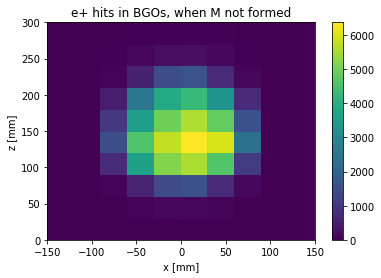

In [72]:
plt.hist2d(coords0[7],coords0[9],range=[[-150,150],[0,300]])
plt.title("e+ hits in BGOs, when M not formed")
plt.xlabel("x [mm]")
plt.ylabel("z [mm]")
plt.colorbar()
plt.show()

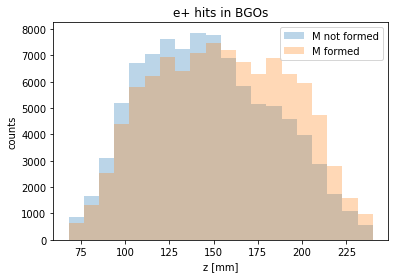

In [73]:
plt.hist(coords0[9],bins=20,range=[68,240], alpha=0.3, label="M not formed")
plt.title("e+ hits in BGOs")
plt.xlabel("z [mm]")
plt.ylabel("counts")

plt.hist(coords1[9],bins=20,range=[68,240], alpha=0.3, label="M formed")
plt.legend()
plt.show()



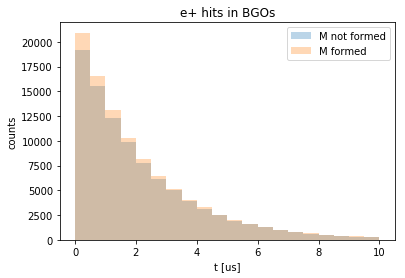

In [74]:
plt.hist(coords0[10],bins=20,range=[0,10], alpha=0.3, label="M not formed")
plt.title("e+ hits in BGOs")
plt.xlabel("t [us]")
plt.ylabel("counts")

plt.hist(coords1[10],bins=20,range=[0,10], alpha=0.3, label="M formed")
plt.legend()
plt.show()

## Time asymmetry in BGOs with coincidences in scintillator

In [32]:
filename_list = ["testcoinc_2sc_0_2M.root", "testcoinc_2sc_04_2M.root"]

coords0 = extract_all_light(filename_list[0], edep_thr_scint=1.5)
coords1 = extract_all_light(filename_list[1], edep_thr_scint=1.5)

100%|██████████| 2000000/2000000 [19:54<00:00, 1674.87it/s]


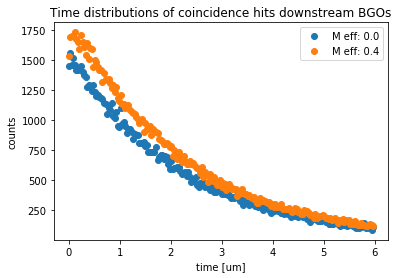

In [34]:
eff_list = [0.0,0.4]

sum_d_lists = []
sum_u_lists = []

divider = 153.4
step = 28.5
#step = 28.5*3
#step = 28.5*5
divider_down = divider+step
divider_up = divider-step
#divider_down_begin = divider+step*3
#divider_down_end = divider+step*5

bins = np.linspace(0,6,201)

for coords in [coords0, coords1]:
    #times = timediff_distr_new(divider_down_begin,divider_down_end, divider_up, coords[5], coords[6])
    times = timediff_distr(divider_down, divider_up, coords[5], coords[6])
    #downstream
    hist0_d = plt.hist(times[0],bins=bins,alpha=0.3)
    #upstream
    #hist0_u = plt.hist(times[1],bins=bins,alpha=0.3)
    #fill lists of lists
    sum_d_lists.append(hist0_d[0])
    #sum_u_lists.append(hist0_u[0])
plt.close()


for sum_d_list, eff in zip(sum_d_lists, eff_list):
    this_label = "M eff: " + str(eff)
    plt.plot(bins[:-1], sum_d_list, 'o', label=this_label)

x = bins[:-1]
y = 180*np.exp(-x/2.2)
#plt.plot(x,y,'-', label="exp")
plt.title("Time distributions of coincidence hits downstream BGOs")
plt.xlabel("time [um]")
plt.ylabel("counts")
plt.legend()
plt.show()

In [99]:
def chisquare(bins, data, norm_exp):
    chisquare = 0
    for obs_time, obs_value in zip(bins, data):
        expected_value = norm_exp*np.exp(-obs_time/2.2)
        #chisquare += (obs_value - expected_value)**2 / expected_value
        chisquare += (obs_value - expected_value)**2 / obs_value
    return chisquare        

Text(0.5, 1.0, 'Chi2 vs. Exp normalisation')

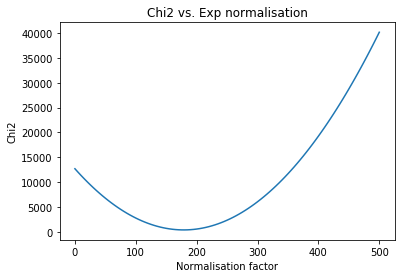

In [101]:
norm_list = np.linspace(0,500,101)
chisq_list = []
for norm in norm_list:
    chisq_list.append(chisquare(bins[:-1], sum_d_list,norm))

plt.plot(norm_list, chisq_list)    
plt.xlabel("Normalisation factor")
plt.ylabel("Chi2")
plt.title("Chi2 vs. Exp normalisation")

In [102]:
print("best normalization factor: ", norm_list[chisq_list.index(min(chisq_list))])
print("minimum chi2: ", min(chisq_list))

best normalization factor:  180.0
minimum chi2:  352.06599598895275


## Time asymmetry in downstream scintillators

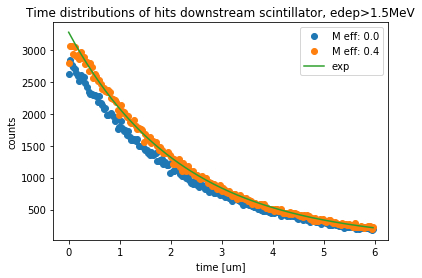

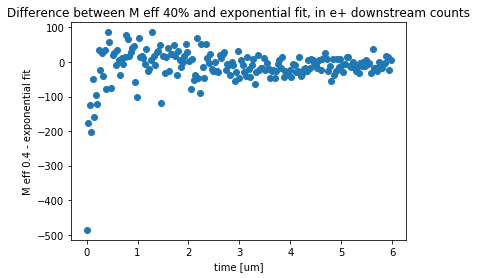

In [113]:
eff_list = [0.0,0.4]

sum_d_lists = []
sum_u_lists = []

divider = 153.4
step = 0
divider_down = divider+step
divider_up = divider-step

bins = np.linspace(0,6,201)

for coords in [coords0, coords1]:
    times = timediff_distr(divider_down, divider_up, coords[2], coords[3])
    #downstream
    hist0_d = plt.hist(times[0],bins=bins,alpha=0.3)
    #upstream
    #hist0_u = plt.hist(times[1],bins=bins,alpha=0.3)
    #fill lists of lists
    sum_d_lists.append(hist0_d[0])
    #sum_u_lists.append(hist0_u[0])
plt.close()


for sum_d_list, eff in zip(sum_d_lists, eff_list):
    this_label = "M eff: " + str(eff)
    plt.plot(bins[:-1], sum_d_list, 'o', label=this_label)

x = bins[:-1]
y = 3275*np.exp(-x/2.2)
plt.plot(x,y,'-', label="exp")
plt.title("Time distributions of hits downstream scintillator, edep>1.5MeV")
plt.xlabel("time [um]")
plt.ylabel("counts")
plt.legend()
plt.show()



diff_list = [i-j for i,j in zip(sum_d_lists[1],y)]
plt.plot(bins[:-1], diff_list,  'o')
plt.xlabel("time [um]")
plt.ylabel("M eff 0.4 - exponential fit")
plt.title("Difference between M eff 40% and exponential fit, in e+ downstream counts")
plt.show()

## Check vacuum emission

In [30]:
#filename = "musr_muvac_5kev.root"
filename = "musr_2.root"
file = uproot.open(filename)
tree = file["t1"]
df1 = tree.pandas.df([b'save_particleID',b'save_detID'])

#save the particle pdg ID, the detector ID and the x,y,z positions
#of the hits in the target and in the scintillators

pID_all = tree[b'save_particleID'].array()
detID_all = tree[b'save_detID'].array()

count = 0

for pID_list, detID_list in zip(pID_all, detID_all):
    z_target = []
    for pID, detID in zip(pID_list, detID_list):
        if pID == -1313 and detID == 700:
            count+=1

print(count/len(pID_all))

0.8571428571428571


## BGOs

In [64]:
filename_eff0 = "testscint_0_500k.root"
data_0 = extract_all(filename_eff0)

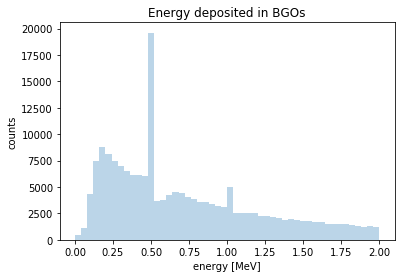

In [65]:
plt.hist(data_0[6],bins=50,range=[0.001,2], alpha=0.3)
#plt.hist(edep_0,bins=50, alpha=0.3)
plt.title("Energy deposited in BGOs")
plt.xlabel("energy [MeV]")
plt.ylabel("counts")
plt.show()

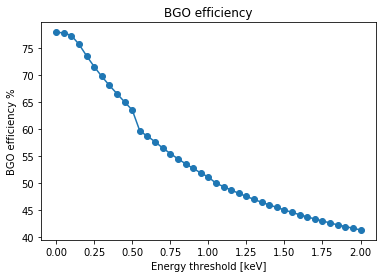

In [66]:
cumul = []
x_axes = np.linspace(0,2,41)
for threshold in x_axes:
    edep_above_thr = [x for x in data_0[6] if x > threshold]
    cumul.append(len(edep_above_thr)/(data_0[0])[-1]*100)

plt.plot(x_axes, cumul, 'o-')
plt.title("BGO efficiency")
plt.xlabel("Energy threshold [keV]")
plt.ylabel("BGO efficiency %")
plt.show()


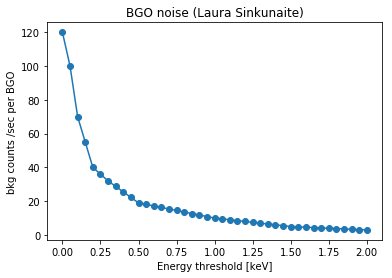

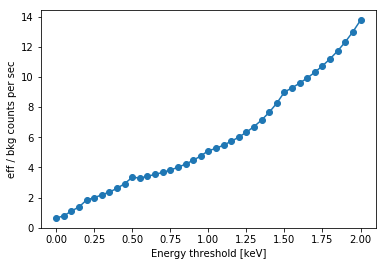

In [67]:
#energy threshold
bkg_sampling = [0,0.05,0.1,0.2,0.3,0.5,1,1.5,2]
#number of bkg counts per BGO per second, given energy threshold
#(integral of number of bkg counts per second above threshold)
bkg_points = [120,100,70,40,32,19,10,5,3]

# make plot as dense as efficiency one

bkg_interp = np.interp(x_axes, bkg_sampling, bkg_points)

plt.plot(x_axes, bkg_interp, 'o-')
plt.title("BGO noise (Laura Sinkunaite)")
plt.xlabel("Energy threshold [keV]")
plt.ylabel("bkg counts /sec per BGO")
plt.show()


#make plot of efficiency/bkg vs energy threshold

plt.plot(x_axes, cumul/bkg_interp, 'o-')
plt.xlabel("Energy threshold [keV]")
plt.ylabel("eff / bkg counts per sec")
plt.show()




## Scintillators

In [68]:
filename_eff0 = "testscint_0_500k.root"
data_0 = extract_all(filename_eff0)
data_0_pos = extract_all(filename_eff0, particles=[-11])
data_0_el = extract_all(filename_eff0, particles=[11])

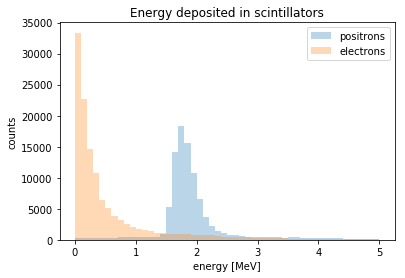

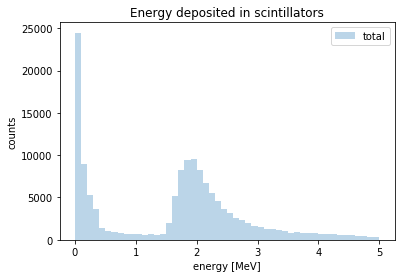

In [69]:
plt.hist(data_0_pos[1],bins=50,range=[0.001,5], alpha=0.3, label='positrons')
plt.hist(data_0_el[1],bins=50,range=[0.001,5], alpha=0.3, label='electrons')
plt.title("Energy deposited in scintillators")
plt.xlabel("energy [MeV]")
plt.ylabel("counts")
plt.legend()
plt.show()


plt.hist(data_0[1],bins=50, range=[0.001,5],alpha=0.3, label='total')
plt.title("Energy deposited in scintillators")
plt.xlabel("energy [MeV]")
plt.ylabel("counts")
plt.legend()
plt.show()





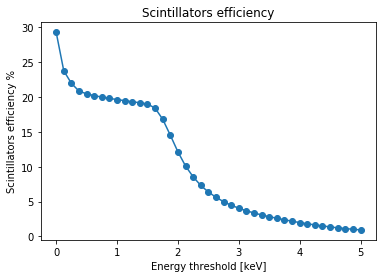

In [70]:
cumul = []
x_axes = np.linspace(0,5,41)
for threshold in x_axes:
    edep_above_thr = [x for x in data_0[1] if x > threshold]
    cumul.append(len(edep_above_thr)/(data_0[0])[-1]*100)

plt.plot(x_axes, cumul, 'o-')
plt.title('Scintillators efficiency')
plt.xlabel("Energy threshold [keV]")
plt.ylabel("Scintillators efficiency %")
plt.show()